https://arxiv.org/pdf/1411.3286.pdf

https://cosmohub.pic.es/

If you make use of the MICE mocks for scientific publications, we kindly ask you to cite the following papers:

"The MICE grand challenge lightcone simulation - I. Dark matter clustering". Fosalba, P.; Crocce, M.; Gaztañaga, E.; Castander, F. J., MNRAS, 448, 2987 (2015)

"The MICE Grand Challenge Lightcone Simulation II: Halo and Galaxy catalogues". Crocce, M.; Castander, F. J.; Gaztanaga, E.; Fosalba, P.; Carretero, J., MNRAS, 453, 1513 (2015)

"The MICE Grand Challenge light-cone simulation - III. Galaxy lensing mocks from all-sky lensing maps". Fosalba, P.; Gaztañaga, E.; Castander, F. J.; Crocce, M., MNRAS, 447, 1319 (2015)

"An algorithm to build mock galaxy catalogues using MICE simulations". Carretero, J.; Castander, F. J.; Gaztañaga, E.; Crocce, M.; Fosalba, P., MNRAS, 447, 646 (2015)

"Measuring the growth of matter fluctuations with third-order galaxy correlations", Hoffmann K., Bel J., Gaztanaga E., Crocce M., Fosalba P., Castander F.J., MNRAS, 447, 1724 (2015)



In [ ]:
mypaths = {'ciberdir':'/data/ytcheng/ciber/',
           'alldat':'/data/ytcheng/ciber/doc/alldat/',
           'PScatdat':'/data/ytcheng/ciber/doc/20170617_Stacking/maps/catcoord/PanSTARRS/',
           '2Mcatdat':'/data/ytcheng/ciber/doc/20170617_Stacking/maps/catcoord/PSC/',
           'HSCcatdat':'/data/ytcheng/ciber/doc/20170617_Stacking/maps/catcoord/HSC/',
           'MCcatdat':'/data/ytcheng/ciber/doc/20170617_Stacking/maps/catcoord/MICECAT/',
          }                        

In [1]:
from micecat import *

In [3]:
for icat in range(90):
    data, rbins, filt_order_arr = run_micecat_fliter_test(1, icat)

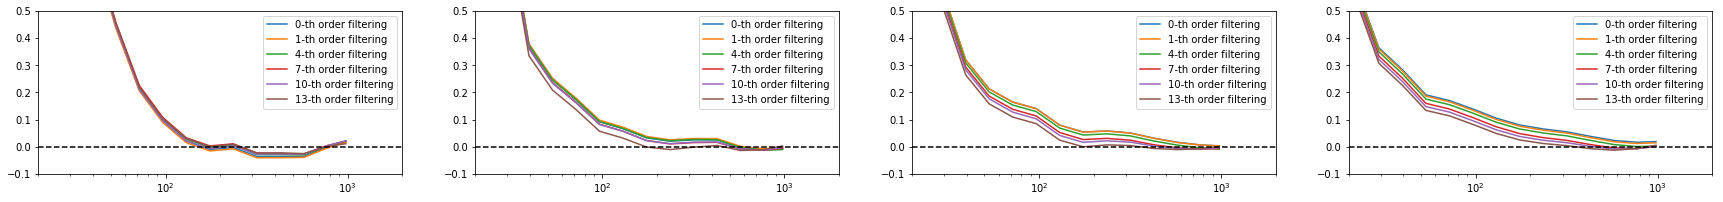

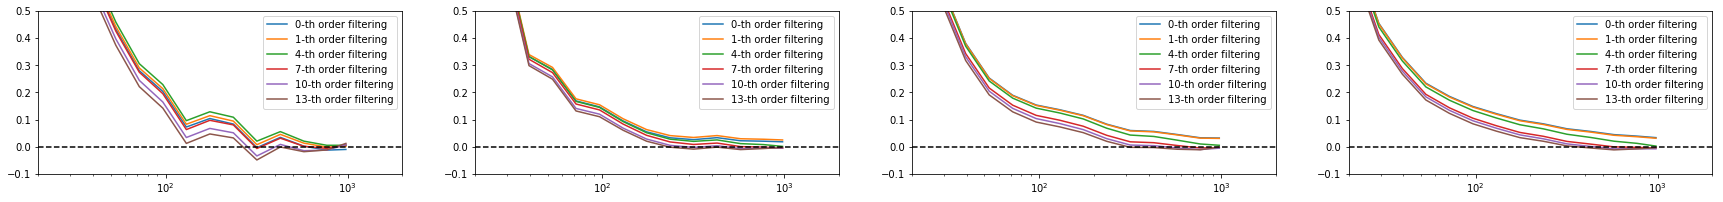

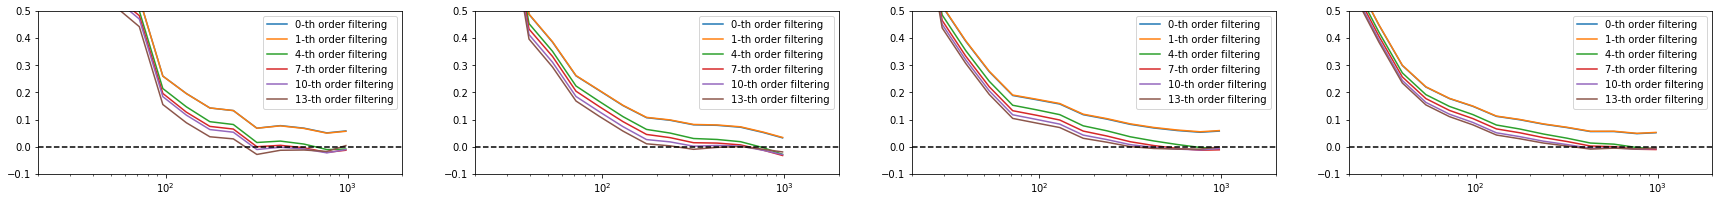

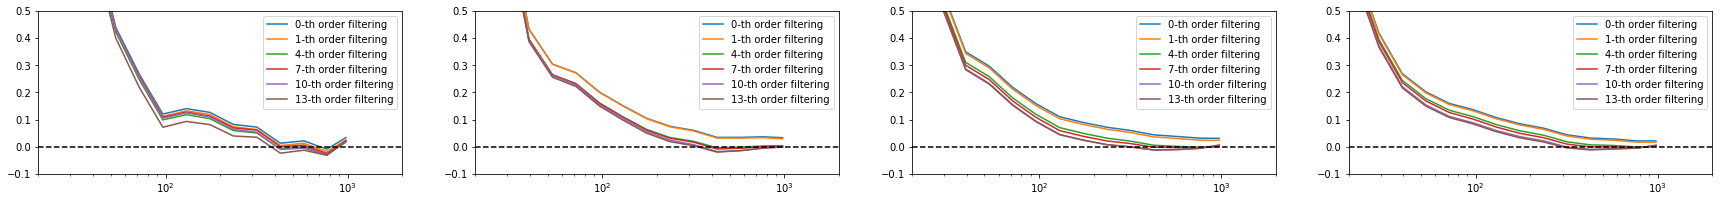

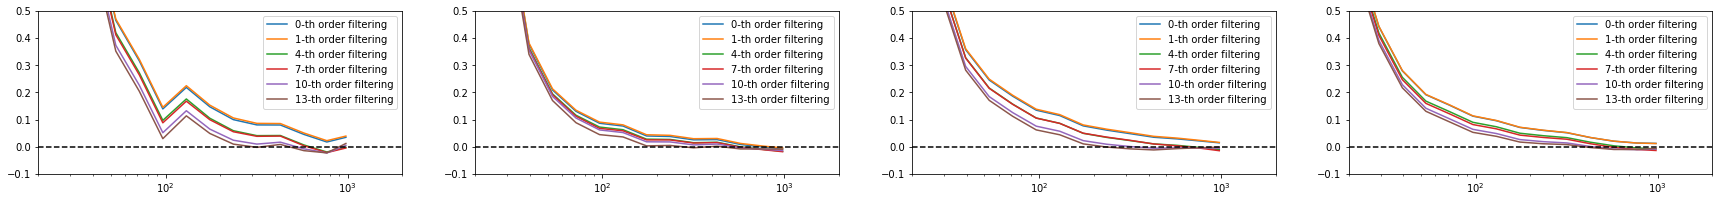

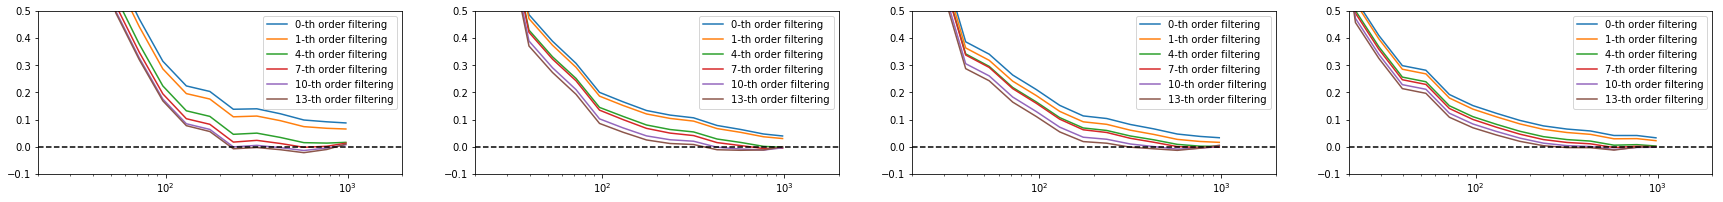

In [29]:
inst = 1
savedir = './micecat_data/'
for icat in [0,1,2,3,4,5]:
    fname  = savedir + 'filter_test_TM%d_icat%d.pkl'%(inst, icat)

    with open(fname,"rb") as f:
        data_dict = pickle.load(f)
    
    filt_order_arr = data_dict['filt_order_arr']
    rbins = data_dict['rbins']
    data = data_dict['data']
    
    fig, ax = plt.subplots(1,4,figsize=(30,3))
    for im, (m_min, m_max) in enumerate(zip(magbindict['m_min'], magbindict['m_max'])):
        for ifilt, filt_order in enumerate(filt_order_arr):
            ax[im].semilogx(rbins, data[ifilt, im],label='%d-th order filtering'%filt_order)
        ax[im].axhline(0, c='k', ls='--')
        ax[im].set_ylim([-0.1,0.5])
        ax[im].set_xlim([2e1,2e3])
        ax[im].legend()
    

In [8]:
data.shape


(6, 4, 25)

Ngal=158, Ncent = 130 (82.28 %), Nsat=28 (17.72 %)
Ngal=686, Ncent = 461 (67.20 %), Nsat=225 (32.80 %)
Ngal=2255, Ncent = 1447 (64.17 %), Nsat=808 (35.83 %)
Ngal=6300, Ncent = 3949 (62.68 %), Nsat=2351 (37.32 %)


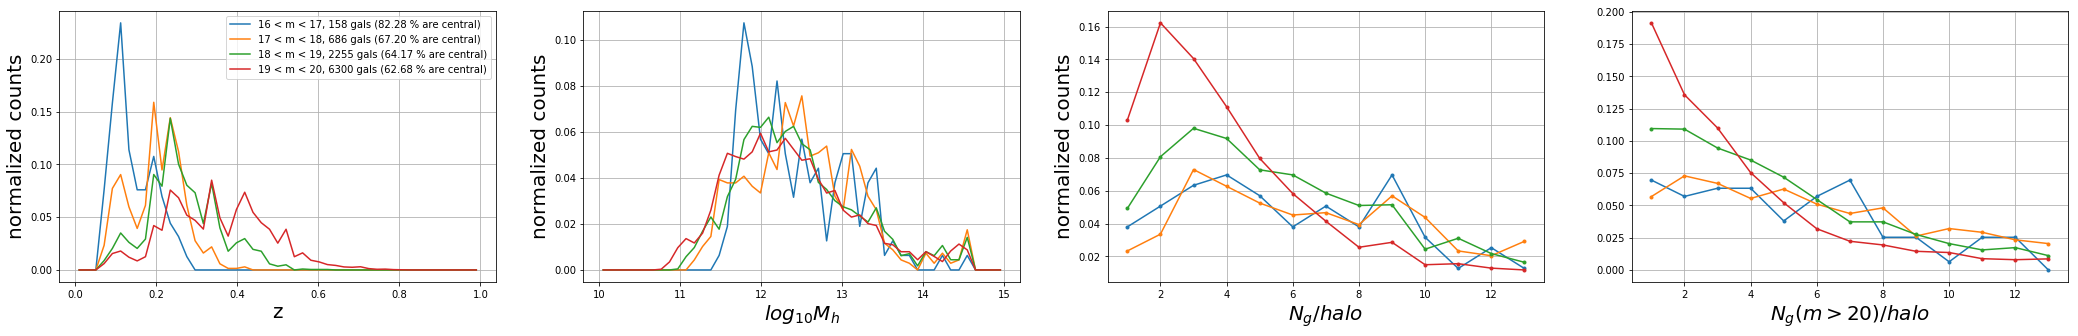

In [12]:
fig, ax = plt.subplots(1, 4, figsize = (36,5))

zbinedges = np.linspace(0,1,50)
zbins = (zbinedges[1:] + zbinedges[:-1])/2
Mhbinedges = np.linspace(10,15,50)
Mhbins = (Mhbinedges[1:] + Mhbinedges[:-1])/2
Ngbinedges = np.arange(1,15,1) - 0.5
Ngbins = (Ngbinedges[1:] + Ngbinedges[:-1])/2
for i,(m_min, m_max) in enumerate(zip(magbindict['m_min'],magbindict['m_max'])):
    dfi = df[(df['euclid_nisp_y_true']>m_min) & (df['euclid_nisp_y_true']<m_max)]
    Ng = len(dfi)
    Ncen = len(dfi[dfi['flag_central']==0]) 
    Nsat = len(dfi[dfi['flag_central']==1]) 
    
    histz,_ = np.histogram(dfi['z_cgal'], bins=zbinedges)
    histMh,_ = np.histogram(dfi['lmhalo'], bins=Mhbinedges)
    # histNsats,_ = np.histogram(dfi['nsats'],bins=Nsatsbinedges)
    
    Nunmasked, Ninhalo = [], []
    for haloid in dfi['unique_halo_id']:
        dfj = df[df['unique_halo_id']==haloid]
        Nunmasked.append(len(dfj[(dfj['euclid_nisp_y_true']>20)]))
        Ninhalo.append(len(dfj))
    Nunmasked = np.array(Nunmasked)
    Ninhalo = np.array(Ninhalo)
    
    histNinhalo,_ = np.histogram(Ninhalo,bins=Ngbinedges)
    histunmasked,_ = np.histogram(Nunmasked,bins=Ngbinedges)

    ax[0].plot(zbins,histz/Ng, label='%d < m < %d, %d gals (%.2f %% are central)'%(m_min, m_max, Ng, Ncen/Ng*100))
    ax[1].plot(Mhbins,histMh/Ng)
    ax[2].plot(Ngbins,histNinhalo/Ng,'.-')
    ax[3].plot(Ngbins,histunmasked/Ng,'.-')
    print('Ngal=%d, Ncent = %d (%.2f %%), Nsat=%d (%.2f %%)'\
          %(Ng,Ncen,Ncen/Ng*100,Nsat,Nsat/Ng*100))

ax[0].legend()
ax[0].set_xlabel('z', fontsize=20)
ax[0].set_ylabel('normalized counts', fontsize=20)
ax[1].set_xlabel(r'$log_{10}M_h$', fontsize=20)
ax[1].set_ylabel('normalized counts', fontsize=20)
ax[2].set_ylabel('normalized counts', fontsize=20)
ax[2].set_xlabel(r'$N_g/halo$', fontsize=20)
ax[2].set_ylabel('normalized counts', fontsize=20)
ax[3].set_xlabel(r'$N_g(m>20)/halo$', fontsize=20)
ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[3].grid()
fig.savefig('/Users/ytcheng/Desktop/micecat.png',
             dpi = 100, bbox_inches='tight')